```Python
"""TFDWT: Fast Discrete Wavelet Transform TensorFlow Layers.
Copyright (C) 2025 Kishore Kumar Tarafdar

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

Demo DWT and IDWT of batched, multichannel tensors"""
```

***This Notebook has additional dependencies***:

1. opencv-python
```bash
pip install opencv-python
```

2. matplotlib: 
```bash
pip install matplotlib
```

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  

In [2]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

In [3]:
!python --version

Python 3.12.11


GPU availability?

In [13]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("CUDA Version:", tf.sysconfig.get_build_info()['cuda_version'])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

TensorFlow version 2.19.0
CUDA Version: 12.5.1
Num GPUs Available:  0


2025-06-20 12:35:30.841914: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-06-20 12:35:30.841939: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-06-20 12:35:30.841944: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-06-20 12:35:30.841946: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-06-20 12:35:30.841952: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: gpu.kkt
2025-06-20 12:35:30.841954: I external/local_xla/xla/stream_executor/cuda/cuda_

0

Select one GPU

        Restrict code to use a particular GPU...

In [2]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

2025-06-20 12:27:02.904050: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-20 12:27:02.912807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750402622.924181 3227479 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750402622.927724 3227479 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750402622.936362 3227479 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [5]:
# select_gpu = gpus[gpu_id]
memory_limit = 8 #GB
select_a_gpu(gpus, gpu_id = 0, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

1 Physical GPUs available 
Selected 1 Logical GPU with 8 GB memory limit


I0000 00:00:1750402487.112245 3224739 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8192 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
import TFDWT
TFDWT.__version__

ModuleNotFoundError: No module named 'TFDWT'

In [9]:
cd ..

/home/kkt/src/TFDWT.pypi


In [4]:

# # include ../dirx 
mylibpath = [
    # '/home/kishor/src/FastDWTConvLayers',
    # '/home/kishor/src/MRSegmentation/Attentions19102023'
      # '/home/k/src/_MEDCNNsrc_part/MEDCNN_copy'
      '/home/kkt/src/TFDWT.pypi/TFDWT'
      # '/home/kishor/src/MEDCNN_copy'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

        utils

In [5]:
def percenterror(x,xhat):
    """Compute percentage error"""
    true = tf.reduce_sum(tf.square(x)).numpy() 
    predict = tf.reduce_sum(tf.square(xhat)).numpy()
    e = (true - predict) / true
    ep = e*100
    # print(f"Percentage error is {e} %")
    print(f"Percentage error is {ep:.3f} % (upto 3 decimal places)")
    return ep

## 1D: DWT, IDWT \& Perfect Reconstruction of sequences

In [10]:
from TFDWT.DWT1DFB import DWT1D, IDWT1D

2025-06-20 12:35:16.447413: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-20 12:35:16.455989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750403116.466634 3234710 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750403116.469861 3234710 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750403116.477753 3234710 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

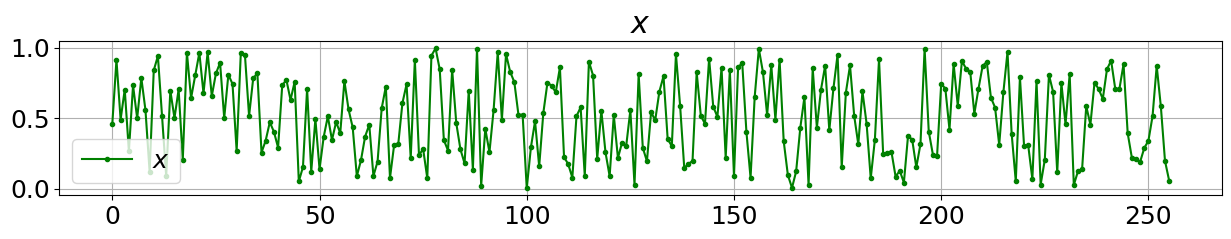

Raw x shape (256,)


In [11]:
# 1D dwt
N = 256 # length of the sequence
input_shape = (N,1)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
x = np.random.rand(input_shape[0])
# x = tmpx
plt.figure(figsize=(15,2))
plt.plot(x, 'g.-',label='$x$')
plt.legend(), plt.grid()
plt.title('$x$')
plt.show()
print(f"Raw x shape {x.shape}")


    DWT 1D 

In [14]:
mother_wavelet = 'bior3.1' # max 'db8' for lenght 16 signal
# mother_wavelet = 'haar' # max 'db8' for lenght 16 signal
# mother_wavelet = 'db10' # max 'db8' for lenght 16 signal

newx = tf.expand_dims(tf.expand_dims(x,-1),0)
print(f'x shape {newx.shape}')
dwtout = DWT1D(wave=mother_wavelet)(newx)
print(f'DWT(x) shape {dwtout.shape}, \nDWT(x) := {dwtout}')


x shape (1, 256, 1)
DWT(x) shape (1, 128, 2), 
DWT(x) := [[[ 0.1572646   0.08681648]
  [ 1.0783452  -0.26745078]
  [ 0.59549767 -0.27522275]
  [ 0.9355934  -0.21623313]
  [ 1.2056935  -0.05428911]
  [ 0.4897238   0.31342694]
  [ 1.2152065  -0.09369706]
  [ 0.4732869   0.32397822]
  [ 0.96106374  0.19470288]
  [ 0.76461595  0.41442767]
  [ 0.85255253  0.0862257 ]
  [ 1.1140002  -0.1813806 ]
  [ 1.1954054  -0.18975821]
  [ 1.405132    0.06763005]
  [ 0.81105155  0.18955654]
  [ 0.4481471  -0.27891824]
  [ 1.7461925  -0.04965261]
  [ 0.75442374  0.16467683]
  [ 0.7434513  -0.22007097]
  [ 0.6292213   0.04337914]
  [ 0.31144458 -0.10562051]
  [ 1.2717575  -0.03896101]
  [ 1.1811354   0.19591498]
  [-0.30044162  0.0626916 ]
  [ 0.65131927 -0.37173057]
  [ 0.4993123  -0.23152657]
  [ 0.76213676  0.04158273]
  [ 0.5476214   0.08825064]
  [ 0.8631738   0.18007305]
  [ 0.75703454  0.05185346]
  [ 0.02420974  0.07161404]
  [ 0.77140945  0.0644519 ]
  [-0.06290303  0.03330691]
  [ 1.279865    0.1

    IDWT 1D

IDWT(DWT(x)) shape (1, 256, 1) 
IDWT(DWT(x)) := [[[0.46066934]
  [0.9140482 ]
  [0.49078047]
  [0.70379627]
  [0.2657336 ]
  [0.7334873 ]
  [0.4991561 ]
  [0.785939  ]
  [0.5575918 ]
  [0.12122019]
  [0.8401018 ]
  [0.9412262 ]
  [0.5142023 ]
  [0.08906077]
  [0.69568485]
  [0.5013771 ]
  [0.7048386 ]
  [0.20466347]
  [0.96529174]
  [0.64236665]
  [0.80464745]
  [0.96436775]
  [0.6768141 ]
  [0.9680299 ]
  [0.6571742 ]
  [0.8176814 ]
  [0.893273  ]
  [0.5013754 ]
  [0.8090145 ]
  [0.74389666]
  [0.26806942]
  [0.9593323 ]
  [0.9485363 ]
  [0.5165587 ]
  [0.78399146]
  [0.81928164]
  [0.25674888]
  [0.34130248]
  [0.47210416]
  [0.4037644 ]
  [0.29173282]
  [0.7334893 ]
  [0.7726577 ]
  [0.6296347 ]
  [0.7589149 ]
  [0.05223592]
  [0.15372592]
  [0.70874774]
  [0.12125819]
  [0.49408278]
  [0.13925564]
  [0.36648867]
  [0.5138946 ]
  [0.3462459 ]
  [0.4729476 ]
  [0.3947787 ]
  [0.7642564 ]
  [0.56273377]
  [0.43543738]
  [0.08904003]
  [0.20237735]
  [0.37033918]
  [0.45456764]
  [0.09

([<matplotlib.lines.Line2D at 0x7f06217ada90>],
 Text(0.5, 1.0, 'reconstuction using bior3.1'))

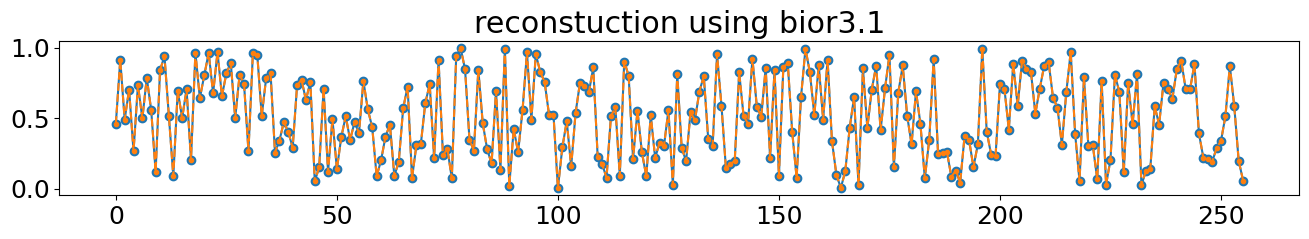

In [15]:
# print(dwtout.shape)
idwtout = IDWT1D(wave=mother_wavelet)(dwtout)
print(f'IDWT(DWT(x)) shape {idwtout.shape} \nIDWT(DWT(x)) := {idwtout}')

print(f'Check perfect reconstruction \nIDWT(DWT(x)) := {idwtout.numpy()} \n\nInput x is {x} ')

    

plt.figure(figsize=(16,2))
plt.plot(x,'o-')
plt.plot(idwtout.numpy()[0,:], '.--'), plt.title(f"reconstuction using {mother_wavelet}")

In [16]:
x.shape, idwtout.shape

((256,), TensorShape([1, 256, 1]))

        Reconstruction error

In [17]:
# tf.reduce_sum(tf.square(x)).numpy() - tf.reduce_sum(tf.square(idwtout)).numpy()
percenterror(x,idwtout)

Percentage error is 0.000 % (upto 3 decimal places)


np.float64(2.014170612919381e-05)

## 2D: DWT, IDWT \& Perfect Reconstruction of Images

In [18]:
from TFDWT.DWT2DFB import DWT2D, IDWT2D

raw x shape: (814, 800)
x shape: (512, 512)


Text(0.5, 1.0, 'input $x$')

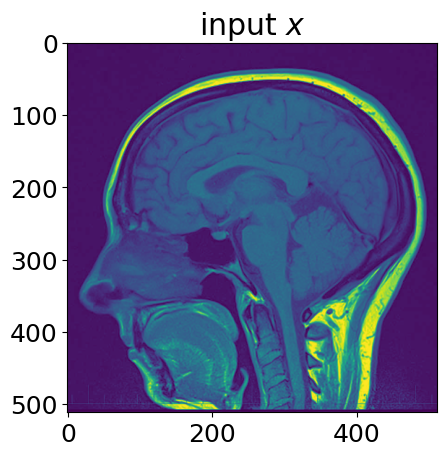

In [19]:
import cv2
x = cv2.imread(f'Tutorials/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x.shape)
x = cv2.resize(x, (512,512))
print('x shape:', x.shape)
#x = x/np.max(x)

import matplotlib.pyplot as plt
plt.imshow(x,label='$x$')
plt.title('input $x$')

raw x shape: (256, 256)


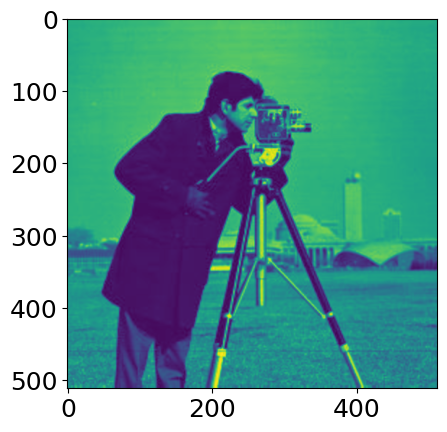

In [20]:
x1 = cv2.imread(f'Tutorials/cameraman.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x1.shape)
x1 = cv2.resize(x1, (512,512))
# print('x shape:', x.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x1,label='$x$')

raw x shape: (256, 256)
x shape: (512, 512)


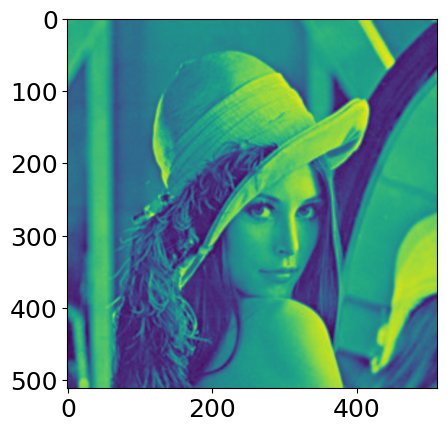

In [21]:
x2 = cv2.imread(f'Tutorials/lena.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x2.shape)
x2 = cv2.resize(x2, (512,512))
print('x shape:', x2.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x2,label='$x$')

    Sample input for 2D TensorFlow layer

In [22]:
x.shape
xnew = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=0)
xnew.shape

xnew1 = tf.expand_dims(tf.expand_dims(x1, axis=-1), axis=0)
xnew1.shape

xnew2 = tf.expand_dims(tf.expand_dims(x2, axis=-1), axis=0)
xnew2.shape


# xnew1 = tf.transpose(xnew, perm=[0,2,1,3])
# xnew1.shape
# del x, x1

xnew = tf.cast(xnew, dtype=tf.float32)/255
xnew1 = tf.cast(xnew1, dtype=tf.float32)/255
xnew2 = tf.cast(xnew2, dtype=tf.float32)/255
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))
print(tf.reduce_min(xnew1)), print(tf.reduce_max(xnew1))
print(tf.reduce_min(xnew2)), print(tf.reduce_max(xnew2))

_1 = tf.concat([xnew,xnew1,xnew2],axis=-1)
_2 = tf.concat([xnew2,xnew,xnew1],axis=-1)
xnew = tf.cast(tf.concat([_1,_2], axis=0), dtype=tf.float32)
_1.shape,_2.shape, xnew.shape, _1.dtype,_2.dtype, xnew.dtype
# del _1, _2

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.003921569, shape=(), dtype=float32)
tf.Tensor(0.99215686, shape=(), dtype=float32)
tf.Tensor(0.09803922, shape=(), dtype=float32)
tf.Tensor(0.9254902, shape=(), dtype=float32)


(TensorShape([1, 512, 512, 3]),
 TensorShape([1, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 tf.float32,
 tf.float32,
 tf.float32)

In [23]:
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


(None, None)

    DWT 2D

(2, 256, 256, 12)
tf.Tensor(-0.31078428, shape=(), dtype=float32)
tf.Tensor(2.40098, shape=(), dtype=float32)


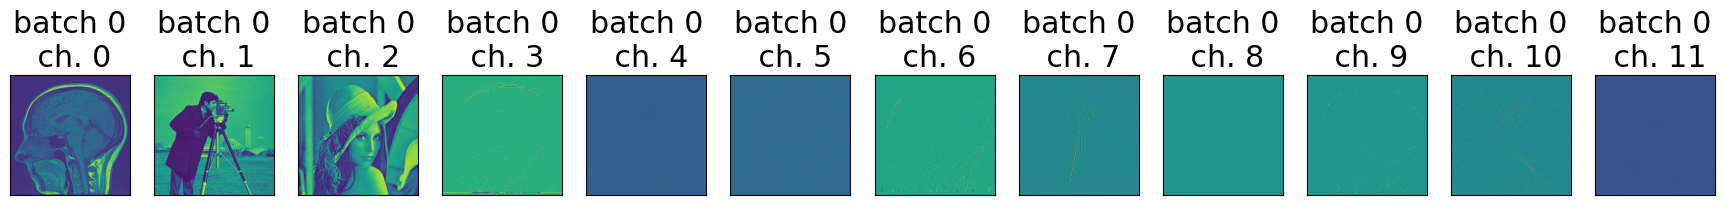

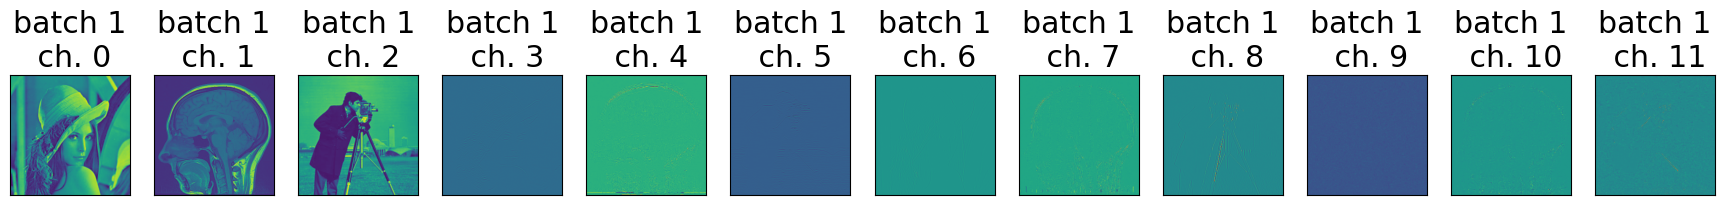

In [24]:
wave = 'haar'
wave = 'db6'
wave = 'bior3.1'
coeffs = DWT2D(wave=wave)(xnew)
print(coeffs.shape)
print(tf.reduce_min(coeffs)), print(tf.reduce_max(coeffs))
# import matplotlib.pyplot as plt

def plotall(_, thresh=0):
    # _ = coeffs
    for b in range(_.shape[0]):
        plt.figure(figsize=(22,8))
        for c in range(_.shape[-1]):
            plt.subplot(1, _.shape[-1], c+1), 
            if thresh==0:
                plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\n ch. {c}')
            else:
                plt.imshow(_[b,:,:,c]>thresh), plt.title(f'batch {b}\n ch. {c}')
            plt.xticks([])
            plt.yticks([])
        plt.show()
plotall(coeffs, 0)    

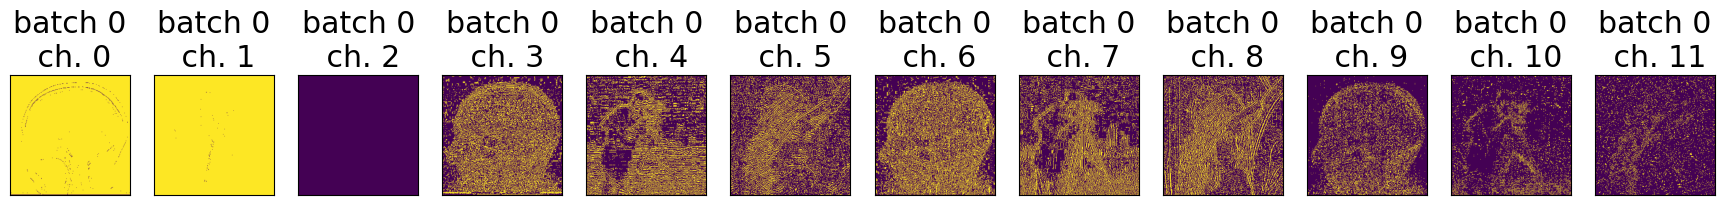

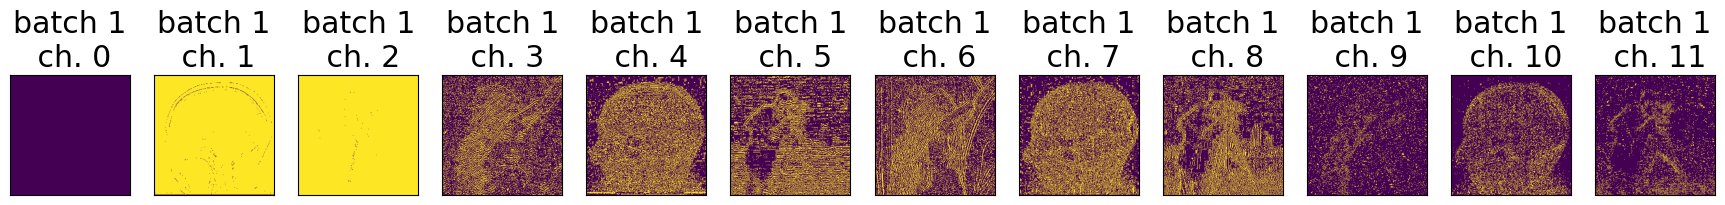

In [25]:
plotall(coeffs, 0.001) 

In [26]:
coeffs.shape

TensorShape([2, 256, 256, 12])

    IDWT 2D

(2, 512, 512, 3) <dtype: 'float32'>


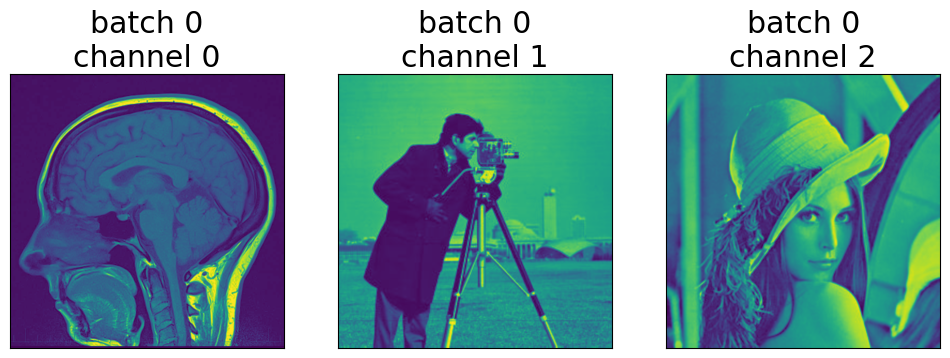

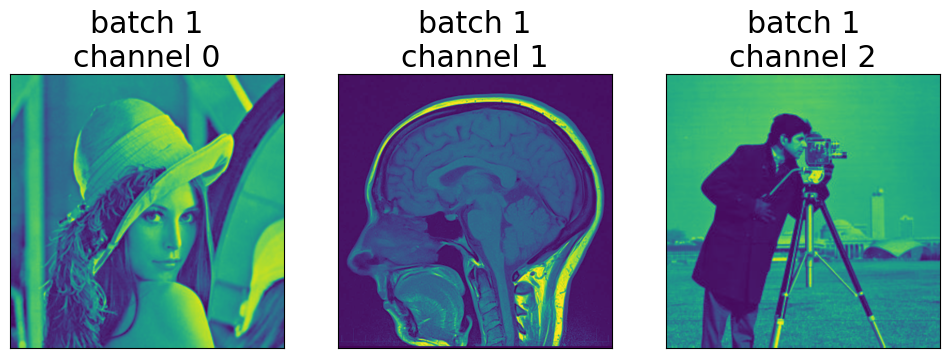

In [27]:
out = IDWT2D(wave=wave)(coeffs)
# [_.shape for _ in out]
print(out.shape, out.dtype)
# import matplotlib.pyplot as plt
_ = out
for b in range(_.shape[0]):
    plt.figure(figsize=(12,4))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\nchannel {c}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [28]:
xnew.shape, out.shape, tf.reduce_sum(tf.square(xnew)), tf.reduce_sum(tf.square(out))

(TensorShape([2, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=332461.65625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=332461.59375>)

        reconstruction error

In [29]:
# tf.reduce_sum(tf.square(xnew)) - tf.reduce_sum(tf.square(out))
percenterror(xnew,out)

Percentage error is 0.000 % (upto 3 decimal places)


np.float32(1.879916e-05)

In [30]:
pwd

'/home/kkt/src/TFDWT.pypi'

## 3D: DWT, IDWT \& Perfect Reconstruction


In [31]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src/TFDWT.pypi/TFDWT'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from DWT3DFB import DWT3D, IDWT3D

In [32]:
# from TFDWT.DWTIDWT3Dv1 import DWT3D, IDWT3D

In [33]:
# x3d = tf.random.uniform((2, 16, 16, 16, 3))
x3d = tf.random.uniform((2, 256, 256, 256, 3))

In [34]:
LLLLLHLHLLHHHLLHLHHHLHHH = DWT3D(wave=wave)(x3d)      # Analysis
x_hat = IDWT3D(wave=wave)(LLLLLHLHLLHHHLLHLHHHLHHH) # Synthesis

Biothogonal wavelet bior3.1


In [35]:
x_hat.shape, LLLLLHLHLLHHHLLHLHHHLHHH.shape

(TensorShape([2, 256, 256, 256, 3]), TensorShape([2, 128, 128, 128, 24]))

In [36]:
x3d.shape, x_hat.shape, tf.reduce_sum(tf.square(x3d)), tf.reduce_sum(tf.square(x_hat))

(TensorShape([2, 256, 256, 256, 3]),
 TensorShape([2, 256, 256, 256, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=33555276.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=33555252.0>)

In [37]:
percenterror(x3d,x_hat)  

Percentage error is 0.000 % (upto 3 decimal places)


np.float32(7.152378e-05)

---

Rough

In [38]:

# # if __name__=='__main__':
# import numpy as np
# import matplotlib.pyplot as plt
# plt.rcParams['font.size'] = '18'
# # from scipy import ndimage
# #from sympy import Matrix


# """
# x = np.random.rand(input_shape[0],input_shape[1])
# plt.figure(figsize=(15,2))
# plt.imshow(x, label='$x$')
# plt.title('$x$')
# """
# import pywt.data
# # Load image
# x1 = pywt.data.camera()

# import cv2
# x = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
# print('raw x shape:', x.shape)
# # x = cv2.resize(x, (512,512))
# x = cv2.resize(x, (256,256))

# print('x shape:', x.shape)
# #x = x/np.max(x)
# plt.imshow(x,label='$x$')
# plt.title('input $x$')

# x_bak = x

# # global N
# N = x.shape[0]
# input_shape = (N,N,1)


# import tensorflow as tf
# import matplotlib
# # import scipy
# import pywt

# x3d = np.concatenate([np.expand_dims(x, axis=-1) for i in range(x.shape[0])], axis=-1)
# print(f'3D input x shape is {x3d.shape}')
# _x3d = tf.cast(x3d, dtype=tf.float32)
# _x3dnew = tf.expand_dims(tf.expand_dims(_x3d, axis=-1), axis=0)
# print('3D shape', _x3dnew.shape)

# # signal 2 with multiple channels
# _x3dnew = tf.concat([_x3dnew,_x3dnew], axis=-1)
# print('3D shape update', _x3dnew.shape)

# coeffs = DWT3D(wave='db2')(_x3dnew)
# print('DWT3D coeffs shape', coeffs.shape)
# i = np.random.randint(128)
# plt.imshow(coeffs[0,:,:,i,4]), plt.title(f"slice {i}")
# plt.show()

# _r3d = IDWT3D(wave='db2')(coeffs)
# print('Reconstruction shape',_r3d.shape)

# i = np.random.randint(256)
# plt.imshow(_r3d[0,:,:,i,0]), plt.title(f"slice {i}")

# # def percenterror(x,xhat):
# #     """Compute percentage error"""
# #     true = tf.reduce_sum(tf.square(x)).numpy() 
# #     predict = tf.reduce_sum(tf.square(xhat)).numpy()
# #     e = (true - predict) / true
# #     ep = e*100
# #     # print(f"Percentage error is {e} %")
# #     print(f"Percentage error is {ep:.3f} % (upto 3 decimal places)")
# #     return ep
    
# percenterror(_x3dnew, _r3d)